In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets

In [ ]:
from utils import Transforms, show_batch
from model import ResNet
from main import train, test

In [2]:
%pip install torchsummary
from torchsummary import summary

Note: you may need to restart the kernel to use updated packages.


In [127]:
train_data = Transforms(datasets.CIFAR10('./data', train=True, download=True), Train=True)
test_data = Transforms(datasets.CIFAR10('./data', train=False, download=True), Train=False)

Files already downloaded and verified
Files already downloaded and verified


In [128]:
SEED = 11

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

dataloader_args = dict(shuffle=True, batch_size=512, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


In [ ]:
show_batch(train_loader)

In [133]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              GELU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          18,496
         MaxPool2d-5           [-1, 64, 16, 16]               0
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              GELU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,928
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             GELU-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             GELU-13           [-1, 64, 16, 16]               0
           Conv2d-14          [-1,

In [134]:
%pip install torch_lr_finder 
from torch_lr_finder import LRFinder

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.57E-02


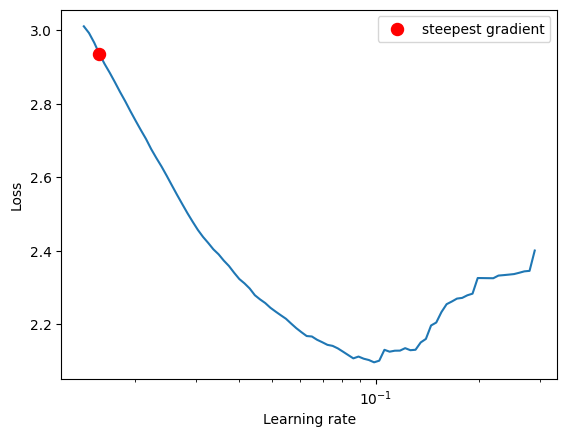

In [140]:
model =  ResNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)

lr_finder = LRFinder(model, optimizer, criterion, device="cuda")

lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")

lr_finder.plot()
lr_finder.reset()

In [141]:
lr = 1.57e-2

In [142]:
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr,steps_per_epoch=len(train_loader), epochs=24,pct_start=0.2,div_factor=10, three_phase=False, final_div_factor=10)

In [143]:
EPOCHS = 24
for epoch in range(EPOCHS):

    print("EPOCH:", epoch + 1)
    train(model, device, train_loader, optimizer, epoch, scheduler)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.2284446954727173 LR=0.003035960970332041 Batch_id=97 Accuracy=40.25: 100%|██████████| 98/98 [00:09<00:00, 10.28it/s] 



Test set: Average loss: 0.0000, Accuracy: 5186/10000 (51.86%)

EPOCH: 2


Loss=1.150376558303833 LR=0.006825481088253323 Batch_id=97 Accuracy=59.75: 100%|██████████| 98/98 [00:09<00:00, 10.04it/s]  



Test set: Average loss: 0.0000, Accuracy: 5713/10000 (57.13%)

EPOCH: 3


Loss=0.8585187196731567 LR=0.011365937964758707 Batch_id=97 Accuracy=68.14: 100%|██████████| 98/98 [00:09<00:00, 10.19it/s]



Test set: Average loss: 0.0000, Accuracy: 6433/10000 (64.33%)

EPOCH: 4


Loss=0.7169659733772278 LR=0.014773076095691753 Batch_id=97 Accuracy=72.48: 100%|██████████| 98/98 [00:09<00:00, 10.20it/s]



Test set: Average loss: 0.0000, Accuracy: 6276/10000 (62.76%)

EPOCH: 5


Loss=0.6713322401046753 LR=0.015695403665586895 Batch_id=97 Accuracy=74.64: 100%|██████████| 98/98 [00:09<00:00, 10.28it/s]



Test set: Average loss: 0.0000, Accuracy: 7415/10000 (74.15%)

EPOCH: 6


Loss=0.6326194405555725 LR=0.015548130769877717 Batch_id=97 Accuracy=77.47: 100%|██████████| 98/98 [00:09<00:00, 10.37it/s]



Test set: Average loss: 0.0000, Accuracy: 6919/10000 (69.19%)

EPOCH: 7


Loss=0.6315160393714905 LR=0.015197312118510352 Batch_id=97 Accuracy=79.06: 100%|██████████| 98/98 [00:09<00:00, 10.34it/s] 



Test set: Average loss: 0.0000, Accuracy: 7869/10000 (78.69%)

EPOCH: 8


Loss=0.5633389353752136 LR=0.01465231924793429 Batch_id=97 Accuracy=79.61: 100%|██████████| 98/98 [00:09<00:00, 10.25it/s]  



Test set: Average loss: 0.0000, Accuracy: 6558/10000 (65.58%)

EPOCH: 9


Loss=0.5413951873779297 LR=0.01392771073572631 Batch_id=97 Accuracy=80.78: 100%|██████████| 98/98 [00:09<00:00, 10.33it/s]  



Test set: Average loss: 0.0000, Accuracy: 8013/10000 (80.13%)

EPOCH: 10


Loss=0.5469859838485718 LR=0.013042843292418484 Batch_id=97 Accuracy=81.81: 100%|██████████| 98/98 [00:09<00:00, 10.25it/s] 



Test set: Average loss: 0.0000, Accuracy: 8092/10000 (80.92%)

EPOCH: 11


Loss=0.5578884482383728 LR=0.012021354679189137 Batch_id=97 Accuracy=82.37: 100%|██████████| 98/98 [00:09<00:00, 10.27it/s] 



Test set: Average loss: 0.0000, Accuracy: 8184/10000 (81.84%)

EPOCH: 12


Loss=0.5380764007568359 LR=0.01089053226441023 Batch_id=97 Accuracy=83.13: 100%|██████████| 98/98 [00:09<00:00, 10.30it/s]  



Test set: Average loss: 0.0000, Accuracy: 8303/10000 (83.03%)

EPOCH: 13


Loss=0.47022396326065063 LR=0.009680584087012124 Batch_id=97 Accuracy=83.77: 100%|██████████| 98/98 [00:09<00:00, 10.31it/s]



Test set: Average loss: 0.0000, Accuracy: 8408/10000 (84.08%)

EPOCH: 14


Loss=0.42790353298187256 LR=0.008423831898994838 Batch_id=97 Accuracy=84.81: 100%|██████████| 98/98 [00:09<00:00, 10.24it/s]



Test set: Average loss: 0.0000, Accuracy: 8503/10000 (85.03%)

EPOCH: 15


Loss=0.4270015358924866 LR=0.007153847743612272 Batch_id=97 Accuracy=85.67: 100%|██████████| 98/98 [00:09<00:00, 10.22it/s]  



Test set: Average loss: 0.0000, Accuracy: 8411/10000 (84.11%)

EPOCH: 16


Loss=0.31072917580604553 LR=0.005904557134106246 Batch_id=97 Accuracy=86.73: 100%|██████████| 98/98 [00:09<00:00, 10.29it/s] 



Test set: Average loss: 0.0000, Accuracy: 8307/10000 (83.07%)

EPOCH: 17


Loss=0.3950071930885315 LR=0.004709332790078064 Batch_id=97 Accuracy=87.54: 100%|██████████| 98/98 [00:09<00:00, 10.22it/s]  



Test set: Average loss: 0.0000, Accuracy: 8687/10000 (86.87%)

EPOCH: 18


Loss=0.30194759368896484 LR=0.0036001031408222257 Batch_id=97 Accuracy=88.75: 100%|██████████| 98/98 [00:09<00:00, 10.22it/s]



Test set: Average loss: 0.0000, Accuracy: 8886/10000 (88.86%)

EPOCH: 19


Loss=0.3024229407310486 LR=0.0026064994104721705 Batch_id=97 Accuracy=89.80: 100%|██████████| 98/98 [00:09<00:00, 10.32it/s] 



Test set: Average loss: 0.0000, Accuracy: 8956/10000 (89.56%)

EPOCH: 20


Loss=0.30011609196662903 LR=0.0017550640691589194 Batch_id=97 Accuracy=90.93: 100%|██████████| 98/98 [00:09<00:00, 10.23it/s]



Test set: Average loss: 0.0000, Accuracy: 9009/10000 (90.09%)

EPOCH: 21


Loss=0.24096566438674927 LR=0.0010685417950927068 Batch_id=97 Accuracy=91.94: 100%|██████████| 98/98 [00:09<00:00, 10.30it/s]



Test set: Average loss: 0.0000, Accuracy: 9106/10000 (91.06%)

EPOCH: 22


Loss=0.22458966076374054 LR=0.0005652718883356056 Batch_id=97 Accuracy=92.85: 100%|██████████| 98/98 [00:09<00:00, 10.22it/s]



Test set: Average loss: 0.0000, Accuracy: 9160/10000 (91.60%)

EPOCH: 23


Loss=0.1828944832086563 LR=0.0002586983669200766 Batch_id=97 Accuracy=93.58: 100%|██████████| 98/98 [00:09<00:00, 10.33it/s]  



Test set: Average loss: 0.0000, Accuracy: 9202/10000 (92.02%)

EPOCH: 24


Loss=0.20441468060016632 LR=0.0001570108322803482 Batch_id=97 Accuracy=93.82: 100%|██████████| 98/98 [00:09<00:00, 10.28it/s] 



Test set: Average loss: 0.0000, Accuracy: 9212/10000 (92.12%)

